In [1]:
import mttime

In [2]:
# Call the Configure object to read the input file and set up the inversion
config = mttime.Configure(path_to_file="mtinv.in")

# Quick look at the attributes
print(config)

       event: {'datetime': '2018-08-12T14:42:09.000000Z', 'longitude': -100.84, 'latitude': 17.11}
       depth: [10.0, 20.0, 44.0]
       green: herrmann
  components: ['Z', 'R', 'T']
      degree: 5
      weight: distance
        plot: False
   correlate: False

| STATION TABLE |
station  distance  azimuth  ts  npts   dt  Z  R  T  longitude  latitude
   CRIG    169.24   103.92  30   128 1.00  1  1  1     -99.30     16.74
   CRIG    169.24   103.92  30   128 1.00  1  1  1     -99.30     16.74
   CRIG    169.24   103.92  30   128 1.00  1  1  1     -99.30     16.74
   DAIG    126.98    94.26  30   128 1.00  1  1  1     -99.65     17.02
   DAIG    126.98    94.26  30   128 1.00  1  1  1     -99.65     17.02
   DAIG    126.98    94.26  30   128 1.00  1  1  1     -99.65     17.02
   MEIG    157.88    54.98  30   128 1.00  1  1  1     -99.62     17.92
   MEIG    157.88    54.98  30   128 1.00  1  1  1     -99.62     17.92
   MEIG    157.88    54.98  30   128 1.00  1  1  1     -99.62     17.

In [3]:
# Pass the parameters to the Inversion object and launch the inversion
# The default is to plot all solutions
tdmt = mttime.Inversion(config=config)
tdmt.invert()

Deviatoric Moment Tensor Inversion
Depth = 10.0000 km
Mw = 4.29
Percent DC/CLVD/ISO = 27/73/0
VR = 23.56%

Deviatoric Moment Tensor Inversion
Depth = 20.0000 km
Mw = 4.34
Percent DC/CLVD/ISO = 28/72/0
VR = 36.76%

Deviatoric Moment Tensor Inversion
Depth = 44.0000 km
Mw = 4.51
Percent DC/CLVD/ISO = 83/17/0
VR = 50.89%



findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


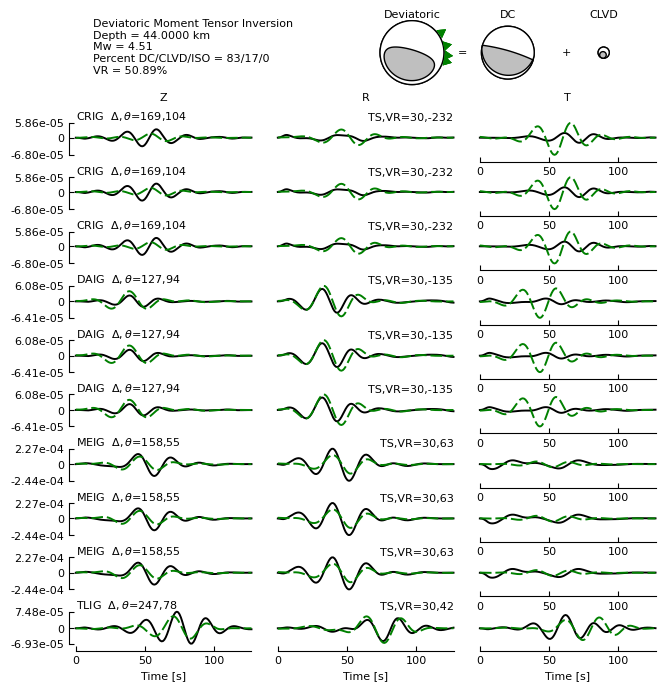

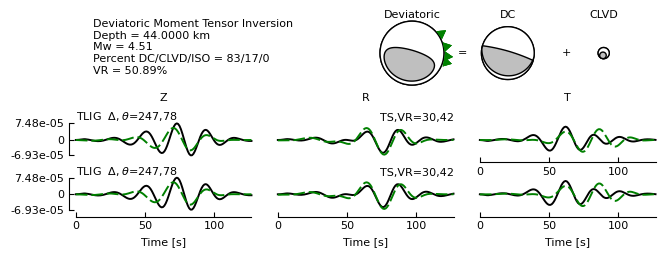

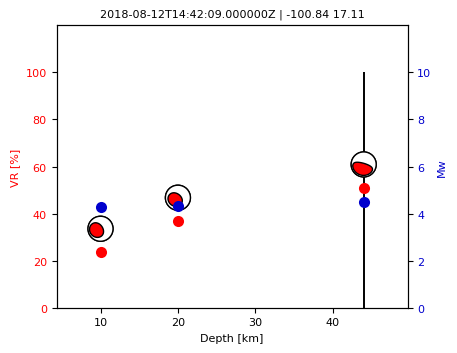

/home/jorge/anaconda3/envs/mecanismos_focales/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/jorge/anaconda3/envs/mecanismos_focales/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/home/jorge/anaconda3/envs/mecanismos_focales/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


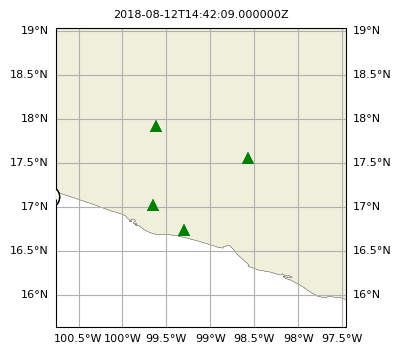

In [4]:
# To save figure to file set show=False

# Plot waveform fits of the best solution (highest VR)
tdmt.plot(view="waveform", option="preferred", show=True) # Ajuste de forma de onda
tdmt.plot(view="depth", show=True) # Solucion en funcion de la profundidad
tdmt.plot(view="map", show=True) # Solucion en un mapa

Full Moment Tensor Inversion
Depth = 10.0000 km
Mw = 4.43
Percent DC/CLVD/ISO = 13/62/25
VR = 26.49%

Full Moment Tensor Inversion
Depth = 20.0000 km
Mw = 4.38
Percent DC/CLVD/ISO = 25/64/10
VR = 37.10%

Full Moment Tensor Inversion
Depth = 44.0000 km
Mw = 4.66
Percent DC/CLVD/ISO = 47/13/40
VR = 55.42%



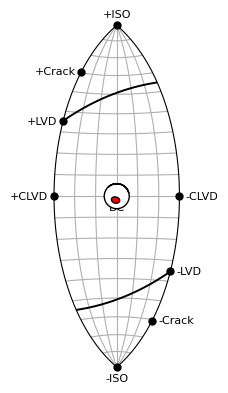

In [5]:
# Compute full moment tensor and plot the result on the lune.
config = mttime.Configure(path_to_file="mtinv.in", degree=6)
tdmt = mttime.Inversion(config=config)
tdmt.invert()
tdmt.plot(view="lune", show=True)

In [6]:
# Finally save the results to file.
# Default is to save all the results
tdmt.write()

# Setting option to 'preferred' will only save the best solution
tdmt.write(option="preferred")